In [405]:
import cv2
import numpy as np
import os

In [406]:
color_list = [(255,0,0),
             (255,255,0),
             (255,0,255),
             (255,255,255),
             (0,0,255),
             (0,255,0),
             (128,0,0),
             (128,128,0),
             (128,0,128),
             (128,128,128),
             (0,0,128),
             (0,128,0),
             (64,0,0),
             (64,64,0),
             (64,0,64),
             (64,64,64),
             (0,0,64),
             (0,64,0),
             (32,0,0),
             (32,32,0),
             (32,0,32),
             (32,32,32),
             (0,0,32),
             (0,32,0)
             ]

In [407]:
classes = np.array([
                         'u-turn', 'keep-right', 'keep-left', 'pass-either-side',
                         'compulsory-motor-cycles-track', 'stop', 'no-left-turn', 'no-right-turn', 'no-u-turn',
                         'no-entry', 'weight-limit-sign-5T', 'weight-limit-sign-30T', 'height-limit-sign-2.-m',
                         'height-limit-sign-3.-m', 'height-limit-sign-4.-m', 'height-limit-sign-5.-m', 'height-limit-sign-6.-m',
                         'speed-limit-20', 'speed-limit-30', 'speed-limit-40', 'speed-limit-50', 'speed-limit-60', 'speed-limit-70',
                         'speed-limit-80', 'speed-limit-90','speed-limit-110', 'no-entry-for-vehicles-ex-5T-truntks-etc',
                         'heavy-vehicles-no-driving-on-right-lane', 'no-parking', 'no-stopping', 'give-way', 'wide-limit-3.-m',
                         'no-overtaking', 'road-work', 'camera-operation-zone', 'crosswind-area', 'caution-hump',
                         'hump-ahead', 'towing-zone', 'left-bend', 'slippery-road', 'pedestrain-crossing-opt1', 'pedestrain-crossing-opt2',
                         'school-childern-crossing-opt1', 'school-childern-crossing-opt2', 'caution', 'narrow-roads-on-the-left',
                         'traffic-lights-ahead', 'obstacles', 'staggered-junctions', 'crossroads-T-junction', 'crossroads-to-the-right',
                         'crossroads-to-the-left', 'exit-to-the-left', 'crossroads', 'minor-road-on-right', 'minor-road-on-left',
                         'minor-road-on-left-opt2', 'cattle-crossing', 'roundabout-ahead', 'narrow-bridge','split-way', 'two-way-road',
                         'divided-road-ending', 'curve-on-the-left', 'crossroads-Y-junction'])

## 1) Calculate the freq of each class and store all the freq < 50 in keep varaibale array

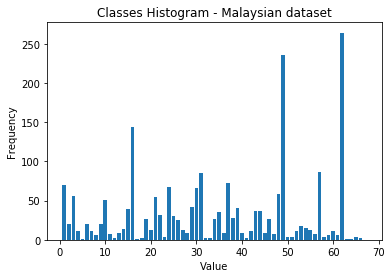

freq->
[ 70  20  56  11   1  20  11   6  20  51   7   2   9  14  39 144   1   2
  26  13  54  32   4  67  30  25  12   9  42  66  85   2   2  27  35   9
  72  28  41   9   2  11  37  37   9  27   8  59 235   3   3  11  18  15
  13   8  87   4   6  11   6 264   1   1   4   2]
Mean: 31.15
Var: 2207.25
Max: 264.00
Min: 1.00
Sum: 2056.00
STD: 46.98
CV: 1.51

Total number of objects: 2056


In [420]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/MTSD/Annotations/gt.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
# print counts
keep = np.where(frq < 50)
# print keep
# print classes[keep]
# print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
# print frq.mean(), frq.var(), frq.max(), frq.min(), frq.sum(), frq.std()
# print len(tmp)


print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

## 2) Loop for each image
### - blur the objects that is not in keep array
### - store only the images that have at least one object in keep array in aug folder
### - store aswell the labels for each image obj in aug folder in aug_labels

In [422]:
im_path = './data/test/Images/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]
#mask_path = './data/test/gt/'
label_path = './data/labels/'

#fname = 'P1840185.JPG'
#fname = 'P1840114.JPG'
#fname = 'P1840116.JPG'
#fname = 'P1860061.JPG'

#keep = [0,2,3,4,5,6,8,9,10,11]
for fname in files:
    
    if not os.path.isfile(os.path.join(label_path, fname.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    
    store = False

    im = cv2.imread(os.path.join(im_path, fname))
    org = im.copy()
    f = open(os.path.join(label_path, fname.split('.')[0]+'.txt'), 'r')
    
    lines = f.readlines()
    text = ''
    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i not in keep[0]:
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1

            #print y2-y1, x2-x1

            #cv2.imwrite('without_aug.jpg', im)
            #print im[y1:y2,x1:x2]

            np.random.shuffle(im[y1:y2+1,x1:x2+1,0])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,0].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,1])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,1].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,2])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,2].T)

            #np.random.shuffle(im[y1:y2,x1:x2])
            #np.random.shuffle(im[y1:y2,x1:x2].T)

            blur = cv2.blur(im, (50, 50))

            #print lines[0] , x1, x2, y1, y2

            #print im[y1:y2,x1:x2,0]
            #cv2.imwrite('aug.jpg', im)

            num =10
            im[y1-num:y2+num,x1-num:x2+num] = blur[y1-num:y2+num,x1-num:x2+num]
            #cv2.imwrite('aug_blur.jpg', im)

    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i in keep[0]:
            store = True
            
            #spl = line.split(' ')
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1
            text += line
            #im2 = cv2.imread(os.path.join(im_path, fname))
            ynum = int(y2-y1)/14
            xnum = int(x2-x1)/14
            im[y1-ynum:y2+ynum,x1-xnum:x2+xnum] = org[y1-ynum:y2+ynum,x1-xnum:x2+xnum]
    
    if store:
        cv2.imwrite(os.path.join('data/test/aug/',fname.split('.')[0]+'_aug'+'.jpg'), im)
        f_out = open(os.path.join('./data/test/aug_labels/', fname.split('.')[0]+'_aug'+'.txt'), 'w')
        f_out.write(text)
        f_out.close()

## 3) Generate the mask image for each aug image

In [423]:
im_path = './data/test/aug/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]

In [424]:
mask_path = './data/test/aug_gt/'
label_path = './data/test/aug_labels/'

for fil in files:
    if not os.path.isfile(os.path.join(label_path, fil.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    im = cv2.imread(os.path.join(im_path, fil))
    f = open(os.path.join(label_path, fil.split('.')[0]+'.txt'))
    #print os.path.join(label_path, fil.split('.')[0]+'.txt')
    lines = f.readlines()
    im_out = np.zeros(im.shape, np.uint8)
    for i, line in enumerate(lines):
        spl = line.split(' ')
        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        #print fil, i, line
        cv2.rectangle(im_out, (x1,y1), (x2,y2),color_list[i], -1)
    #print '______'
    cv2.imwrite(os.path.join(mask_path, fil), im_out)

## 4) Augment the images with ground truth mask

In [307]:
import Augmentor

In [330]:
p = Augmentor.Pipeline("./data/test/aug")
p.ground_truth("./data/test/aug_gt")

Initialised with 395 image(s) found.
Output directory set to ./data/test/aug/output.395 ground truth image(s) found.


In [331]:
p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.2)
p.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=8)
p.skew_tilt(probability=0.5, magnitude=0.3)
p.skew(probability=0.5, magnitude=0.3)

In [332]:
#p.remove_operation(operation_index=0)

p.status()

Operations: 5
	0: RotateRange (max_right_rotation=10.0 max_left_rotation=-10.0 probability=0.5 )
	1: Zoom (min_factor=1.1 max_factor=1.2 probability=0.5 )
	2: Distort (randomise_magnitude=True magnitude=8 grid_height=4 probability=0.5 grid_width=4 )
	3: Skew (magnitude=0.5 skew_type=TILT probability=0.5 )
	4: Skew (magnitude=0.5 skew_type=RANDOM probability=0.5 )
Images: 395
Classes: 1
	Class index: 0 Class label: aug 
Dimensions: 19
	Width: 1917 Height: 981
	Width: 1917 Height: 977
	Width: 4592 Height: 3448
	Width: 1920 Height: 981
	Width: 1917 Height: 979
	Width: 1920 Height: 985
	Width: 1919 Height: 979
	Width: 1920 Height: 979
	Width: 1915 Height: 981
	Width: 3840 Height: 2160
	Width: 1919 Height: 977
	Width: 1920 Height: 977
	Width: 1917 Height: 983
	Width: 1920 Height: 983
	Width: 1915 Height: 975
	Width: 1919 Height: 981
	Width: 1917 Height: 975
	Width: 3920 Height: 2208
	Width: 1919 Height: 983
Formats: 1
	 JPEG

You can remove operations using the appropriate index and the rem

In [333]:
p.sample(395*10, multi_threaded=True)

Processing <PIL.Image.Image image mode=RGB size=1919x979 at 0x7FD8781C7490>: 100%|██████████| 395/395 [13:40<00:00,  2.08s/ Samples]                   


## 5) Create the annotation for the new augmented images

In [449]:
aug_path = './data/test/aug/output/'
files = [f for f in os.listdir(aug_path) if os.path.isfile(os.path.join(aug_path,f))]

gts = []
augs = []

for fi in files:
    if 'original' in fi:
        augs.append(fi)
    else:
        gts.append(fi)

In [450]:
print gts[0].split('_')[6] in augs[0].split('_')[4]
print gts[0]
print augs[0]
x = 'aug_original_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg'
y = x.replace('aug_original_', '_groundtruth_(1)_aug_')
print y, os.path.isfile(os.path.join(aug_path, y))
print len(augs), len(gts)

print label_path, mask_path

False
_groundtruth_(1)_aug_68_aug.jpg_382b7478-7e90-4361-8468-ea119b5dbc5f.jpg
aug_original_P1860055_aug.jpg_03763ed1-9aba-4813-8e0a-182955d61ce1.jpg
_groundtruth_(1)_aug_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg False
8350 8350
./data/test/aug_labels/ ./data/test/aug_gt/


In [453]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
mask_gt_path = './data/test/aug/output/'
label_path = './data/test/aug_labels/'

f_out = open('gt_phase_1.txt', 'w')
for aug in augs:
    aug_sp = aug.split('_')
    gt = aug.replace('aug_original_', '_groundtruth_(1)_aug_')
    org_file =  aug_sp[2]+'_'+aug_sp[3]
    
    
    if not os.path.exists(os.path.join(label_path, org_file.split('.')[0]+'.txt')):
        continue
        
    im = cv2.imread(os.path.join(mask_gt_path,gt))
    f = open(os.path.join(label_path, org_file.split('.')[0]+'.txt'), 'r')
    
    #im[im == 255] = 1
    #im[im == 0] = 255
    #im[im == 1] = 0
    lines = f.readlines()
    #print 'Number of objects', len(lines)
    for i in range(0, len(lines)):
        lower = np.array(color_list[i])-10
        upper = np.array(color_list[i])+10
        mask = cv2.inRange(im, lower, upper)
        im3 = cv2.bitwise_and(im, im, mask=mask)


        #print 'obj#', i
        im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

        #print np.max(im2), np.min(im2)

        #cv2.imwrite(org_file+str(i)+'_thr.jpg', im2)
        ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
        _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #print len(contours), org_file
        if len(contours) == 0:
            continue
        #for i in range(0, len(contours)):
            #if(i%2 == 0)

        # getting the maximum width contours
        x,y,w,h = cv2.boundingRect(contours[0])
        for cnt in contours:
            cx, cy, cw, ch = cv2.boundingRect(cnt)
            if cw > w:
                x,y,w,h = cx, cy, cw, ch
        #cnt = contours[i]

        #cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
        cls_num = np.where(classes == lines[i].split(' ')[0])[0][0]
        f_out.write('./output/'+aug+';'+str(x)+';'+str(y)+';'+str(x+w)+';'+str(y+h)+';'+ str(cls_num) +'\n')
        #print (x,y), (x+w, y+h)
        #cv2.imwrite(org_file+str(i)+'.jpg', im)

        #print '_______'
f_out.close()

## End Phase 1

## Check histogram

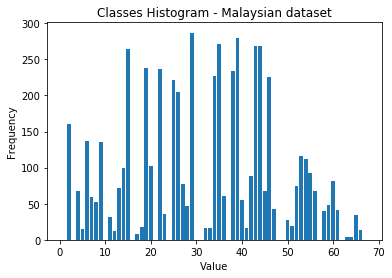

freq->
[160  68  15 137  59  52 136  31  12  72  99 265   8  18 238 102 237  36
 221 205  77  47 287  16  17 227 271  61 234 279  55  17  89 268 269  68
 226  42  27  19  74 116 112  93  68  40  48  82  41   4   4  35  14]
Mean: 103.74
Var: 8122.01
Max: 287.00
Min: 4.00
Sum: 5498.00
STD: 90.12
CV: 0.87

Total number of objects: 5498


In [461]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = '/home/hossam/workspace/sklearn/augmentation/gt_phase_1.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

In [463]:
!cat gt.txt > gt_phase_1_after_aug.txt
!cat gt_phase_1.txt >> gt_phase_1_after_aug.txt

## Phase 2

## 1) Calculate the freq of each class and store all the freq < 50 in keep varaibale array

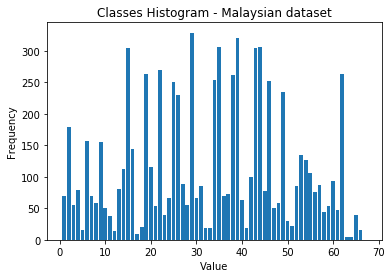

freq->
[ 70 180  56  79  16 157  70  58 156  51  38  14  81 113 304 144   9  20
 264 115  54 269  40  67 251 230  89  56 329  66  85  18  19 254 306  70
  72 262 320  64  19 100 305 306  77 253  50  59 235  30  22  85 134 127
 106  76  87  44  54  93  47 264   5   5  39  16]
Mean: 114.45
Var: 9312.10
Max: 329.00
Min: 5.00
Sum: 7554.00
STD: 96.50
CV: 0.84

Total number of objects: 7554


In [460]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = '/home/hossam/workspace/sklearn/augmentation/gt_phase_1_after_aug.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

In [443]:
keep = np.where(frq < 50)
print keep

(array([ 4, 10, 11, 16, 17, 22, 31, 32, 40, 49, 50, 57, 60, 62, 63, 64, 65]),)


## 2) Loop for each image
### - blur the objects that is not in keep array
### - store only the images that have at least one object in keep array in aug folder
### - store aswell the labels for each image obj in aug folder in aug_labels

In [444]:
im_path = './data/test/Images/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]
#mask_path = './data/test/gt/'
label_path = './data/labels/'

#fname = 'P1840185.JPG'
#fname = 'P1840114.JPG'
#fname = 'P1840116.JPG'
#fname = 'P1860061.JPG'

#keep = [0,2,3,4,5,6,8,9,10,11]
for fname in files:
    
    if not os.path.isfile(os.path.join(label_path, fname.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    
    store = False

    im = cv2.imread(os.path.join(im_path, fname))
    org = im.copy()
    f = open(os.path.join(label_path, fname.split('.')[0]+'.txt'), 'r')
    
    lines = f.readlines()
    text = ''
    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i not in keep[0]:
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1

            #print y2-y1, x2-x1

            #cv2.imwrite('without_aug.jpg', im)
            #print im[y1:y2,x1:x2]

            np.random.shuffle(im[y1:y2+1,x1:x2+1,0])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,0].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,1])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,1].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,2])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,2].T)

            #np.random.shuffle(im[y1:y2,x1:x2])
            #np.random.shuffle(im[y1:y2,x1:x2].T)

            blur = cv2.blur(im, (50, 50))

            #print lines[0] , x1, x2, y1, y2

            #print im[y1:y2,x1:x2,0]
            #cv2.imwrite('aug.jpg', im)

            num =10
            im[y1-num:y2+num,x1-num:x2+num] = blur[y1-num:y2+num,x1-num:x2+num]
            #cv2.imwrite('aug_blur.jpg', im)

    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i in keep[0]:
            store = True
            
            #spl = line.split(' ')
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1
            text += line
            #im2 = cv2.imread(os.path.join(im_path, fname))
            ynum = int(y2-y1)/14
            xnum = int(x2-x1)/14
            im[y1-ynum:y2+ynum,x1-xnum:x2+xnum] = org[y1-ynum:y2+ynum,x1-xnum:x2+xnum]
    
    if store:
        cv2.imwrite(os.path.join('data/test/aug/',fname.split('.')[0]+'_aug'+'.jpg'), im)
        f_out = open(os.path.join('./data/test/aug_labels/', fname.split('.')[0]+'_aug'+'.txt'), 'w')
        f_out.write(text)
        f_out.close()

## 3) Generate the mask image for each aug image

In [445]:
im_path = './data/test/aug/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]

In [446]:
mask_path = './data/test/aug_gt/'
label_path = './data/test/aug_labels/'

for fil in files:
    if not os.path.isfile(os.path.join(label_path, fil.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    im = cv2.imread(os.path.join(im_path, fil))
    f = open(os.path.join(label_path, fil.split('.')[0]+'.txt'))
    #print os.path.join(label_path, fil.split('.')[0]+'.txt')
    lines = f.readlines()
    im_out = np.zeros(im.shape, np.uint8)
    for i, line in enumerate(lines):
        spl = line.split(' ')
        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        #print fil, i, line
        cv2.rectangle(im_out, (x1,y1), (x2,y2),color_list[i], -1)
    #print '______'
    cv2.imwrite(os.path.join(mask_path, fil), im_out)

## 4) Augment the images with ground truth mask

In [448]:
import Augmentor

p = Augmentor.Pipeline("./data/test/aug")
p.ground_truth("./data/test/aug_gt")

p.rotate(probability=0.4, max_left_rotation=5, max_right_rotation=5)
p.zoom(probability=0.3, min_factor=1.05, max_factor=1.1)
p.random_distortion(probability=0.7, grid_width=2, grid_height=2, magnitude=5)
p.skew_tilt(probability=0.5, magnitude=0.2)
p.skew(probability=0.5, magnitude=0.2)

p.sample(44*100, multi_threaded=False)

Executing Pipeline:   0%|          | 0/4400 [00:00<?, ? Samples/s]

Initialised with 44 image(s) found.
Output directory set to ./data/test/aug/output.44 ground truth image(s) found.


Processing P1840559_aug.jpg: 100%|██████████| 4400/4400 [8:28:29<00:00,  7.78s/ Samples]   


In [449]:
aug_path = './data/test/aug/output/'
files = [f for f in os.listdir(aug_path) if os.path.isfile(os.path.join(aug_path,f))]

gts = []
augs = []

for fi in files:
    if 'original' in fi:
        augs.append(fi)
    else:
        gts.append(fi)

In [462]:
print gts[0].split('_')[6] in augs[0].split('_')[4]
print gts[0]
print augs[0]
x = 'aug_original_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg'
y = x.replace('aug_original_', '_groundtruth_(1)_aug_')
print y, os.path.isfile(os.path.join(aug_path, y))
print len(augs), len(gts)

print label_path, mask_path

False
_groundtruth_(1)_aug_68_aug.jpg_382b7478-7e90-4361-8468-ea119b5dbc5f.jpg
aug_original_P1860055_aug.jpg_03763ed1-9aba-4813-8e0a-182955d61ce1.jpg
_groundtruth_(1)_aug_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg False
8350 8350
./data/test/aug_labels/ ./data/test/aug_gt/


## 5) Create the annotation for the new augmented images

In [453]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
mask_gt_path = './data/test/aug/output/'
label_path = './data/test/aug_labels/'

f_out = open('gt_phase_2.txt', 'w')
for aug in augs:
    aug_sp = aug.split('_')
    gt = aug.replace('aug_original_', '_groundtruth_(1)_aug_')
    org_file =  aug_sp[2]+'_'+aug_sp[3]
    
    
    if not os.path.exists(os.path.join(label_path, org_file.split('.')[0]+'.txt')):
        continue
        
    im = cv2.imread(os.path.join(mask_gt_path,gt))
    f = open(os.path.join(label_path, org_file.split('.')[0]+'.txt'), 'r')
    
    #im[im == 255] = 1
    #im[im == 0] = 255
    #im[im == 1] = 0
    lines = f.readlines()
    #print 'Number of objects', len(lines)
    for i in range(0, len(lines)):
        lower = np.array(color_list[i])-10
        upper = np.array(color_list[i])+10
        mask = cv2.inRange(im, lower, upper)
        im3 = cv2.bitwise_and(im, im, mask=mask)


        #print 'obj#', i
        im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

        #print np.max(im2), np.min(im2)

        #cv2.imwrite(org_file+str(i)+'_thr.jpg', im2)
        ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
        _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #print len(contours), org_file
        if len(contours) == 0:
            continue
        #for i in range(0, len(contours)):
            #if(i%2 == 0)

        # getting the maximum width contours
        x,y,w,h = cv2.boundingRect(contours[0])
        for cnt in contours:
            cx, cy, cw, ch = cv2.boundingRect(cnt)
            if cw > w:
                x,y,w,h = cx, cy, cw, ch
        #cnt = contours[i]

        #cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
        cls_num = np.where(classes == lines[i].split(' ')[0])[0][0]
        f_out.write('./output/'+aug+';'+str(x)+';'+str(y)+';'+str(x+w)+';'+str(y+h)+';'+ str(cls_num) +'\n')
        #print (x,y), (x+w, y+h)
        #cv2.imwrite(org_file+str(i)+'.jpg', im)

        #print '_______'
f_out.close()

## Check histogram for phase 2 images

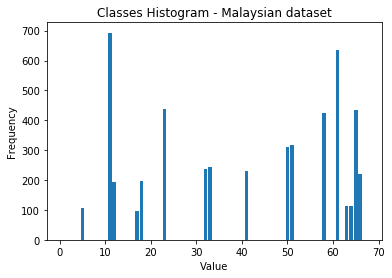

freq->
[108 693 193  96 197 437 236 242 231 312 317 423 636 114 114 436 220]
Mean: 294.41
Var: 29881.89
Max: 693.00
Min: 96.00
Sum: 5005.00
STD: 172.86
CV: 0.59

Total number of objects: 5005


In [467]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = '/home/hossam/workspace/sklearn/augmentation/gt_phase_2.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

In [464]:
!cat gt.txt > gt_phase_2_after_aug.txt
!cat gt_phase_2.txt >> gt_phase_2_after_aug.txt

!cat gt_phase_1_after_aug.txt > gt_phase_1_2_after_aug.txt
!cat gt_phase_2.txt >> gt_phase_1_2_after_aug.txt

## Check histogram for phase 2 images merged with original images

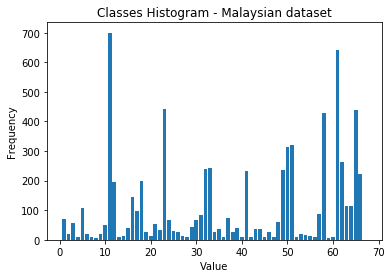

freq->
[ 70  20  56  11 109  20  11   6  20  51 700 195   9  14  39 144  97 199
  26  13  54  32 441  67  30  25  12   9  42  66  85 238 244  27  35   9
  72  28  41   9 233  11  37  37   9  27   8  59 235 315 320  11  18  15
  13   8  87 427   6  11 642 264 115 115 440 222]
Mean: 106.98
Var: 22324.92
Max: 700.00
Min: 6.00
Sum: 7061.00
STD: 149.42
CV: 1.40

Total number of objects: 7061


In [468]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = '/home/hossam/workspace/sklearn/augmentation/gt_phase_2_after_aug.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

## Check histogram for phase 2 images merged with phase 1 and the original Image

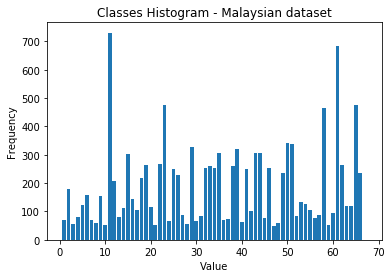

freq->
[ 70 180  56  79 124 157  70  58 156  51 731 207  81 113 304 144 105 217
 264 115  54 269 477  67 251 230  89  56 329  66  85 254 261 254 306  70
  72 262 320  64 250 100 305 306  77 253  50  59 235 342 339  85 134 127
 106  76  87 467  54  93 683 264 119 119 475 236]
Mean: 190.29
Var: 20855.39
Max: 731.00
Min: 50.00
Sum: 12559.00
STD: 144.41
CV: 0.76

Total number of objects: 12559


In [469]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = '/home/hossam/workspace/sklearn/augmentation/gt_phase_1_2_after_aug.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

# Elimination
1- All images are in Images_all withound the mask image

2- all the annotation are in gt_phase_1_2_after_aug.txt

what i have to do:

1- Generate for each image a dictienary to all objects in the image

2- Collect the total frequancy for each object

3- from 1 & 2 check loop for each **class out of 66** image check if freq > 50 

    if True:
        loop for all images
            check if we delete the image no other object freq in the image will not be less 50:
                if yes -> delete the whole image and its annotation from the groundtruth then update the freq array
                if no -> then hide the objects that will not be affected then update the annotation as well as the freq array
                

# For Testing

In [385]:
print classes[16]

height-limit-sign-6.-m


In [148]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
ff = 'P1840185.JPG'
im = cv2.imread(os.path.join(mask_path,ff))
f = open(os.path.join(label_path, ff.split('.')[0]+'.txt'), 'r')
#im[im == 255] = 1
#im[im == 0] = 255
#im[im == 1] = 0
lines = f.readlines()
print 'Number of objects', len(lines)
for i in range(0, len(lines)):
    lower = np.array(color_list[i])-10
    upper = np.array(color_list[i])+10
    mask = cv2.inRange(im, lower, upper)
    im3 = cv2.bitwise_and(im, im, mask=mask)


    print 'obj#', i
    im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

    print np.max(im2), np.min(im2)

    cv2.imwrite('test'+str(i)+'.jpg', im2)
    ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
    _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print len(contours)
    #for i in range(0, len(contours)):
        #if(i%2 == 0)
    
    # getting the maximum width contours
    x,y,w,h = cv2.boundingRect(contours[0])
    for cnt in contours:
        cx, cy, cw, ch = cv2.boundingRect(cnt)
        if cw > w:
            x,y,w,h = cx, cy, cw, ch
    #cnt = contours[i]
    
    cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
    print (x,y), (x+w, y+h)
    cv2.imwrite(str(i)+'.jpg', im)
    
    print '_______'

Number of objects 7
obj# 0
32 0
1
(240, 1832) (786, 2371)
_______
obj# 1
179 0
4
(255, 1207) (791, 1744)
_______
obj# 2
106 0
9
(640, 89) (814, 260)
_______
obj# 3
255 0
5
(1776, 1737) (1851, 1812)
_______
obj# 4
79 0
16
(2840, 1731) (2877, 1768)
_______
obj# 5
150 0
6
(1831, 1743) (1896, 1829)
_______
obj# 6
17 0
13
(1811, 1609) (1896, 1689)
_______


In [40]:
im = cv2.imread('./data/test/images/P1840121.JPG')
f = open('./data/labels/P1840121.txt')
lines = f.readlines()

im_out = np.zeros(im.shape, np.uint8)

for line in lines:
    spl = line.split(' ')
    x1 = int(spl[1])+1
    y1 = int(spl[2])+1
    x2 = int(spl[3])-1
    y2 = int(spl[4])-1
    
    cv2.rectangle(im_out, (x1,y1), (x2,y2),(255,255,255), -1)
    
cv2.imwrite('test.jpg', im_out)   

True

In [123]:
im = cv2.imread('./data/test/gt/P1840217.JPG')
im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(im2, 8, 8 ,8)
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(0, len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    cv2.rectangle(im, (x,y), (x+w, y+h), (0,255,0), 2)
    print (x,y), (x+w, y+h)
    cv2.imwrite(str(i)+'.jpg', im)

(2644, 1198) (2805, 1366)
(2800, 1360) (2804, 1365)
(2654, 1360) (2801, 1365)
(2650, 1360) (2654, 1364)
(2645, 1360) (2649, 1365)
(2650, 1199) (2653, 1361)
(2646, 1199) (2649, 1361)
